In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文名称
plt.rcParams['axes.unicode_minus']=False

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
#对GPU使用模式进行设置，使其允许内存增长，在程序允许时，根据需要为TensorFlow进程分配GPU显存
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True) 

In [3]:
mnist = tf.keras.datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [4]:
X_train, X_test = tf.cast(train_x/255.0, tf.float32), tf.cast(test_x/255.0, tf.float32)
y_train, y_test = tf.cast(train_y, tf.int32), tf.cast(test_y, tf.int32)

In [5]:
X_train = train_x.reshape(60000, 28, 28, 1)
X_test = test_x.reshape(10000, 28, 28, 1)

In [6]:
model = tf.keras.Sequential([
    
    #unit 1
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), padding="same", activation=tf.nn.relu, input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    #unit 2
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    #unit 3
    tf.keras.layers.Flatten(),
    
    #unit 4
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               200832    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [8]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['sparse_categorical_accuracy'])

In [9]:
history = model.fit(X_train,y_train,batch_size=64,epochs=5,validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 16s 21ms/step - loss: 2.1185 - sparse_categorical_accuracy: 0.8446 - val_loss: 0.0769 - val_sparse_categorical_accuracy: 0.9787
Epoch 2/5
750/750 [==============================] - 21s 28ms/step - loss: 0.0599 - sparse_categorical_accuracy: 0.9808 - val_loss: 0.0729 - val_sparse_categorical_accuracy: 0.9787
Epoch 3/5
750/750 [==============================] - 21s 28ms/step - loss: 0.0371 - sparse_categorical_accuracy: 0.9884 - val_loss: 0.0654 - val_sparse_categorical_accuracy: 0.9819
Epoch 4/5
750/750 [==============================] - 22s 29ms/step - loss: 0.0297 - sparse_categorical_accuracy: 0.9908 - val_loss: 0.0734 - val_sparse_categorical_accuracy: 0.9811
Epoch 5/5
750/750 [==============================] - 21s 28ms/step - loss: 0.0243 - sparse_categorical_accuracy: 0.9918 - val_loss: 0.0882 - val_sparse_categorical_accuracy: 0.9783


In [10]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0886 - sparse_categorical_accuracy: 0.9769


[0.0885857343673706, 0.9768999814987183]

In [11]:
pd.DataFrame(history.history).to_csv("training_log.csv",index=False)

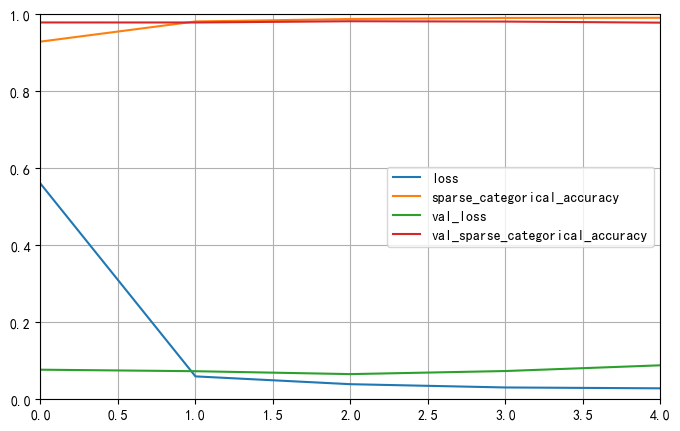

In [13]:
#读取保存后的训练日志文件
graph = pd.read_csv("training_log.csv")

#画训练曲线
graph.plot(figsize = (8,5))
plt.grid(1) #网格线
plt.xlim(0, 4)
plt.ylim(0, 1)
plt.show()

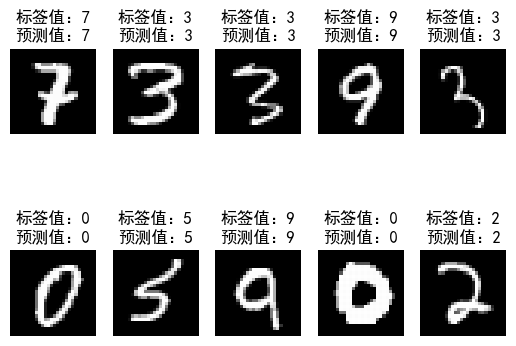

In [15]:
plt.figure()
for i in range(10):
    num = np.random.randint(1,10000)
    
    plt.subplot(2, 5, i + 1)
    plt.axis('off')
    plt.imshow(test_x[num], cmap='gray')
    demo = tf.reshape(X_test[num],(1,28,28,1))
    y_pred = np.argmax(model.predict(demo))
    plt.title('标签值：'+str(test_y[num])+'\n预测值：'+str(y_pred))
    
plt.show()

In [16]:
model.save_weights("mnist.h5")